In [75]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [76]:
def plot_graph(a):
    index = np.arange(len(a))
    plt.figure(figsize=(20,10))
    plt.bar(a.index, a.tolist())
    plt.xlabel('Countries', fontsize=10)
    plt.ylabel('Sales', fontsize=10)
    plt.xticks(a.index, a.index, fontsize=10, rotation=30)
    plt.title('Sales')

plt.show()
ds = pd.read_csv("data/sales_data_sample.csv", encoding="latin1");

# ds_c = ds.loc[ds['YEAR_ID'] == 2004]


# a = ds_c.groupby('COUNTRY').sum().total_venda
# ds.head()
# plot_graph(a)

In [77]:
ds.rename(columns={"ORDERNUMBER": "n_pedido", "QUANTITYORDERED": "qtde_encomendada", "PRICEEACH":"preco_cada",
                  "SALES":"total_venda", "ORDERLINENUMBER": "ol", "ORDERDATE":"data", "STATUS":"status", 
                   "MONTH_ID":"mes", "YEAR_ID":"ano", "PRODUCTLINE":"tipo_produto", "MSRP":"preco_sugerido", 
                   "CUSTOMERNAME": "nome_cliente", "PHONE":"telefone", "ADDRESSLINE1":"end1", "CITY":"cidade",
                  "STATE":"estado", "COUNTRY":"pais", "DEALSIZE":"tamanho"}, inplace=True)

ds = ds.drop(["n_pedido", "QTR_ID", "PRODUCTCODE", "ADDRESSLINE2", "POSTALCODE", "TERRITORY", "CONTACTLASTNAME", 
              "CONTACTFIRSTNAME"], axis=1)

In [78]:
# ds[ds["n_pedido"] == 10213]

In [79]:
ds.columns

Index(['qtde_encomendada', 'preco_cada', 'ol', 'total_venda', 'data', 'status',
       'mes', 'ano', 'tipo_produto', 'preco_sugerido', 'nome_cliente',
       'telefone', 'end1', 'cidade', 'estado', 'pais', 'tamanho'],
      dtype='object')

In [80]:
ds.head()

,qtde_encomendada,preco_cada,ol,total_venda,data,status,mes,ano,tipo_produto,preco_sugerido,nome_cliente,telefone,end1,cidade,estado,pais,tamanho
0,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,2,2003,Motorcycles,95,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,NY,USA,Small
1,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,5,2003,Motorcycles,95,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,NaN,France,Small
2,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,7,2003,Motorcycles,95,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,NaN,France,Medium
3,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,8,2003,Motorcycles,95,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,CA,USA,Medium
4,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,10,2003,Motorcycles,95,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,CA,USA,Medium


In [81]:
ds.describe().T.drop(["count"], axis=1)

,mean,std,min,25%,50%,75%,max
qtde_encomendada,35.092809,9.741443,6.00,27.00,35.0,43.0,97.0
preco_cada,83.658544,20.174277,26.88,68.86,95.7,100.0,100.0
ol,6.466171,4.225841,1.00,3.00,6.0,9.0,18.0
total_venda,3553.889072,1841.865106,482.13,2203.43,3184.8,4508.0,14082.8
mes,7.092455,3.656633,1.00,4.00,8.0,11.0,12.0
ano,2003.815090,0.699670,2003.00,2003.00,2004.0,2004.0,2005.0
preco_sugerido,100.715551,40.187912,33.00,68.00,99.0,124.0,214.0


In [82]:
ds.ano.value_counts()

2004    1345
2003    1000
2005     478
Name: ano, dtype: int64

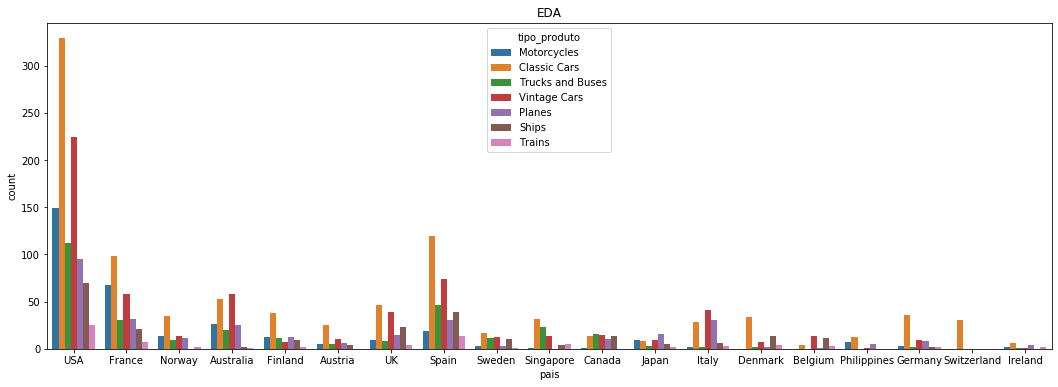

In [83]:
plt.figure(figsize=(18,6))
sns.countplot(x='pais', hue = 'tipo_produto', data= ds)
plt.title('EDA')
plt.show()

In [87]:
ds.tipo_produto.value_counts()/ds.shape[0]*100

Classic Cars        34.254339
Vintage Cars        21.501948
Motorcycles         11.725115
Planes              10.839532
Trucks and Buses    10.662416
Ships                8.289054
Trains               2.727595
Name: tipo_produto, dtype: float64

In [89]:
ds.columns

Index(['qtde_encomendada', 'preco_cada', 'ol', 'total_venda', 'data', 'status',
       'mes', 'ano', 'tipo_produto', 'preco_sugerido', 'nome_cliente',
       'telefone', 'end1', 'cidade', 'estado', 'pais', 'tamanho'],
      dtype='object')

In [92]:
ds_eua = ds[ds.pais == "USA"]

In [94]:
ds_eua.estado.unique()

array(['NY', 'CA', 'NJ', 'CT', 'MA', 'PA', 'NH', 'NV'], dtype=object)

In [95]:
pd.crosstab(ds_eua.estado, ds_eua.tipo_produto, normalize=True)*100

tipo_produto,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
estado,,,,,,,
CA,11.553785,5.378486,3.685259,2.390438,0.796813,5.179283,12.450199
CT,1.992032,0.996016,1.494024,0.199203,0.398406,0.498008,0.498008
MA,5.876494,2.888446,1.892430,2.689243,0.398406,1.693227,3.486056
NH,1.792829,0.000000,0.000000,0.000000,0.000000,0.298805,1.294821
NJ,0.000000,0.697211,0.896414,0.199203,0.000000,0.000000,0.298805
NV,1.992032,0.000000,0.000000,0.000000,0.000000,0.000000,0.896414
NY,6.772908,3.585657,0.996016,1.294821,0.697211,2.191235,2.191235
PA,2.788845,1.294821,0.498008,0.199203,0.199203,1.294821,1.195219


In [98]:
pd.crosstab(ds.mes, ds.tipo_produto, normalize=True)*100

tipo_produto,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
mes,,,,,,,
1,2.763018,0.850159,0.602196,0.637620,0.247963,0.814736,2.196245
2,2.585902,1.204392,1.098123,0.743889,0.247963,0.708466,1.346086
3,2.337938,0.637620,0.850159,0.779313,0.212540,0.673043,2.019129
4,1.948282,1.133546,1.168969,0.389656,0.106270,0.283386,1.275239
5,3.046405,0.991853,0.850159,0.637620,0.212540,1.416932,1.771165
6,1.204392,0.495926,0.814736,0.602196,0.106270,0.531350,0.885583
7,2.054552,0.673043,0.425080,0.318810,0.106270,0.637620,0.779313
8,2.302515,1.098123,0.850159,0.637620,0.212540,0.531350,1.133546
9,2.125399,0.495926,0.425080,0.531350,0.212540,0.779313,1.487779


In [102]:
ds_g = ds.groupby("ano").count()

In [104]:
# plt.figure(figsize=(18,6))
# sns.countplot(x='mes', hue = 'tipo_produto', data= ds_g)
# plt.title('EDA')
# plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support fo

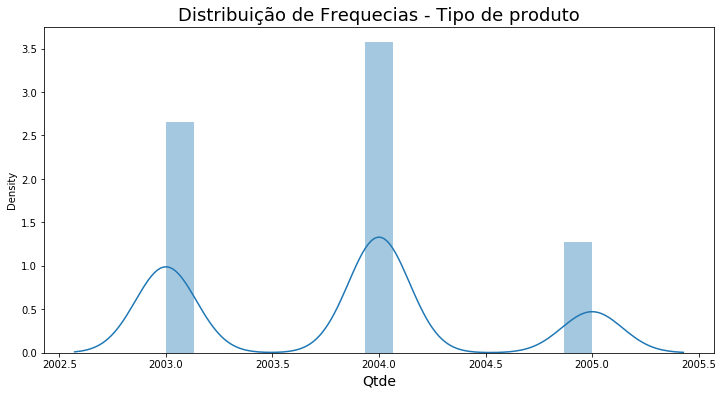

In [117]:
ax = sns.distplot(ds.ano)
ax.figure.set_size_inches(12,6)
ax.set_title("Distribuição de Frequecias - Tipo de produto", fontsize=18)
ax.set_xlabel("Qtde", fontsize=14)
ax

In [118]:
ds['data'] = pd.to_datetime(ds['data'])

In [122]:
ds.columns

Index(['qtde_encomendada', 'preco_cada', 'ol', 'total_venda', 'data', 'status',
       'mes', 'ano', 'tipo_produto', 'preco_sugerido', 'nome_cliente',
       'telefone', 'end1', 'cidade', 'estado', 'pais', 'tamanho'],
      dtype='object')

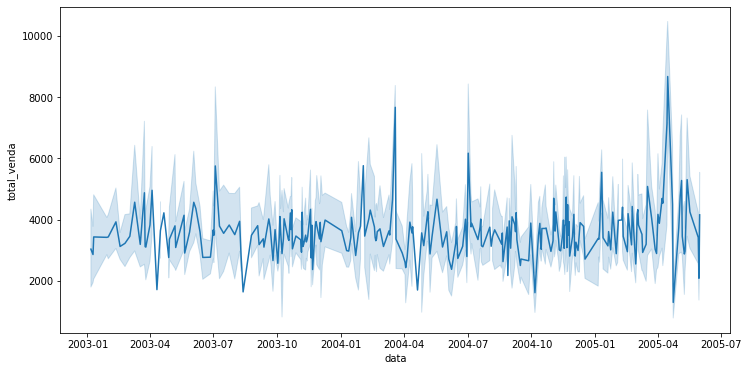

In [124]:
ax = sns.lineplot(x='data', y='total_venda', data=ds)
ax.figure.set_size_inches(12,6)
ax

In [125]:
sns.set_palette("Accent")
sns.set_style("darkgrid")

In [126]:
ds['aumento'] = ds.total_venda.diff()

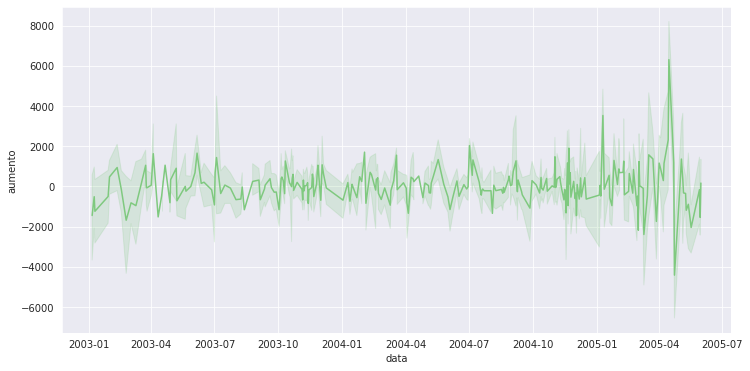

In [127]:
ax = sns.lineplot(x='data', y='aumento', data=ds)
ax.figure.set_size_inches(12,6)
ax

In [128]:
ds[["total_venda", "aumento"]]

,total_venda,aumento
0,2871.00,NaN
1,2765.90,-105.10
2,3884.34,1118.44
3,3746.70,-137.64
4,5205.27,1458.57
...,...,...
2818,2244.40,-1836.32
2819,3978.51,1734.11
2820,5417.57,1439.06
2821,2116.16,-3301.41
